In [186]:
# -*- coding: utf-8 -*-
#/Users/nikhilmehta1/documents/GitHub/covid-data-challenge/raw_data/turnstile_data
"""
Created on Tue Apr  21 2020

@author: nikhilmehta1
"""

import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import dateutil
from dateutil.parser import parse
import pylab
from matplotlib import pyplot as plt
from IPython import get_ipython
import datetime
import matplotlib.dates
import math
from tqdm import tqdm_notebook
%matplotlib inline
plt.style.use('dark_background')
plt.figure(figsize = (10,10))
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
import numpy as np
import pandas as pd

turnstile_use_daily = pd.read_csv("nyc-transit-data-turnstile_daily_counts_2020.csv")

#raw data files
turnstile_200201 = pd.read_csv("turnstile_200201.txt")
turnstile_200208 = pd.read_csv("turnstile_200208.txt")
turnstile_200215 = pd.read_csv("turnstile_200215.txt")
turnstile_200222 = pd.read_csv("turnstile_200222.txt")
turnstile_200229 = pd.read_csv("turnstile_200229.txt")
turnstile_200307 = pd.read_csv("turnstile_200307.txt")
turnstile_200314 = pd.read_csv("turnstile_200314.txt")
turnstile_200321 = pd.read_csv("turnstile_200321.txt")
turnstile_200328 = pd.read_csv("turnstile_200328.txt")

<Figure size 720x720 with 0 Axes>

In [187]:
#generate coords
station_coords = turnstile_use_daily.drop(['daytime_routes', 'division', 'line', 'borough', 'structure', 'complex_id', 'date', 'entries', 'exits'], axis = 1)
station_coords = station_coords.drop_duplicates()
station_coords = station_coords.reset_index()
station_coords = station_coords.drop('index', axis = 1)
station_coords

,stop_name,gtfs_longitude,gtfs_latitude
0,Astoria - Ditmars Blvd,-73.912034,40.775036
1,Hewes St,-73.953431,40.706870
2,Marcy Av,-73.957757,40.708359
3,Bowery,-73.993915,40.720280
4,Broad St,-74.011056,40.706476
5,Middle Village - Metropolitan Av,-73.889601,40.711396
6,Fresh Pond Rd,-73.895877,40.706186
7,Forest Av,-73.903077,40.704423
8,Seneca Av,-73.907740,40.702762
9,Knickerbocker Av,-73.919711,40.698664


In [188]:
station_coords.to_csv('station_coords.csv')

In [189]:
turnstile_total = pd.concat([turnstile_200201, turnstile_200208, turnstile_200215, turnstile_200222, turnstile_200229, turnstile_200307, turnstile_200314, turnstile_200321, turnstile_200328], axis = 0)
turnstile_total

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,03:00:00,REGULAR,7356095,2493703
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,07:00:00,REGULAR,7356105,2493714
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,11:00:00,REGULAR,7356170,2493761
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,15:00:00,REGULAR,7356333,2493812
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,19:00:00,REGULAR,7356581,2493862
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,23:00:00,REGULAR,7356730,2493891
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2020,03:00:00,REGULAR,7356770,2493906
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2020,07:00:00,REGULAR,7356776,2493910
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2020,11:00:00,REGULAR,7356826,2493953
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2020,15:00:00,REGULAR,7356974,2493994


In [190]:
#sorting turnstile data by station, turnstile unit, SCP, date, and then time
turnstile_total = turnstile_total.sort_values(by = ["STATION", "UNIT", "SCP", "DATE", "TIME"])
turnstile_total = turnstile_total.set_index(["STATION", "UNIT", "SCP", "C/A"])
turnstile_total

LINENAME DIVISION        DATE      TIME     DESC  \
STATION   UNIT SCP      C/A                                                     
1 AV      R248 00-00-00 H007        L      BMT  01/25/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  23:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  23:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  23:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  23:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  23:00:00  REGULAR   
...                               ...      ...         ...       ...      ...   
ZEREGA AV R326 00-05-01 R419        6      IRT  03/23/2020  01:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  05:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  09:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  13:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  17:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  21:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  01:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  05:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  09:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  13:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  17:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  21:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  01:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  05:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  09:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  13:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  

In [191]:
turnstile_total

LINENAME DIVISION        DATE      TIME     DESC  \
STATION   UNIT SCP      C/A                                                     
1 AV      R248 00-00-00 H007        L      BMT  01/25/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/25/2020  23:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/26/2020  23:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/27/2020  23:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/28/2020  23:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  03:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  07:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  11:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  15:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  19:00:00  REGULAR   
                        H007        L      BMT  01/29/2020  23:00:00  REGULAR   
...                               ...      ...         ...       ...      ...   
ZEREGA AV R326 00-05-01 R419        6      IRT  03/23/2020  01:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  05:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  09:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  13:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  17:00:00  REGULAR   
                        R419        6      IRT  03/23/2020  21:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  01:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  05:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  09:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  13:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  17:00:00  REGULAR   
                        R419        6      IRT  03/24/2020  21:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  01:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  05:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  09:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  13:00:00  REGULAR   
                        R419        6      IRT  03/25/2020  

In [197]:
#for t_unit, new_df in turnstile_total.groupby(level = "SCP")
listy = []
turnstile_copy = turnstile_total
for scp, elem in tqdm_notebook(turnstile_total.groupby(level = [0,1,2])):
    elem["ENTR DIFF"] = elem["ENTRIES"].diff()
    #turnstile_copy = pd.merge(turnstile_copy, elem, how='right', on = ['STATION', 'UNIT', 'SCP', 'DATE', 'TIME'])
    listy.append(elem)


/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [232]:
#turnstile_copy = pd.merge(turnstile_copy, listy, how='right', on = ['STATION', 'UNIT', 'SCP', 'DATE', 'TIME'])
turnstile_concat = pd.concat(listy)

In [233]:
turnstile_conctat = turnstile_concat.reset_index(level = ["STATION","SCP", "UNIT", "C/A"], inplace = True)

In [235]:
turnstile_concat = turnstile_concat.sort_values(by = ["STATION", "DATE", "TIME"])
turnstile_concat = turnstile_concat.set_index(["STATION","DATE", "TIME"])
turnstile_concat

UNIT       SCP    C/A LINENAME DIVISION  \
STATION   DATE       TIME                                                
1 AV      01/25/2020 03:00:00  R248  00-00-00   H007        L      BMT   
                     03:00:00  R248  00-00-01   H007        L      BMT   
                     03:00:00  R248  00-03-00   H007        L      BMT   
                     03:00:00  R248  00-03-01   H007        L      BMT   
                     03:00:00  R248  00-03-02   H007        L      BMT   
                     03:00:00  R248  02-03-00  H007A        L      BMT   
                     03:00:00  R248  02-03-01  H007A        L      BMT   
                     03:00:00  R248  02-03-02  H007A        L      BMT   
                     03:00:00  R248  02-03-03  H007A        L      BMT   
                     03:00:00  R248  02-03-04  H007A        L      BMT   
                     07:00:00  R248  00-00-00   H007        L      BMT   
                     07:00:00  R248  00-00-01   H007        L      BMT   
                     07:00:00  R248  00-03-00   H007        L      BMT   
                     07:00:00  R248  00-03-01   H007        L      BMT   
                     07:00:00  R248  00-03-02   H007        L      BMT   
                     07:00:00  R248  02-03-00  H007A        L      BMT   
                     07:00:00  R248  02-03-01  H007A        L      BMT   
                     07:00:00  R248  02-03-02  H007A        L      BMT   
                     07:00:00  R248  02-03-03  H007A        L      BMT   
                     07:00:00  R248  02-03-04  H007A        L      BMT   
                     11:00:00  R248  00-00-00   H007        L      BMT   
                     11:00:00  R248  00-00-01   H007        L      BMT   
                     11:00:00  R248  00-03-00   H007        L      BMT   
                     11:00:00  R248  00-03-01   H007        L      BMT   
                     11:00:00  R248  00-03-02   H007        L      BMT   
                     15:00:00  R248  00-00-00   H007        L      BMT   
                     15:00:00  R248  00-00-01   H007        L      BMT   
                     15:00:00  R248  00-03-00   H007        L      BMT   
                     15:00:00  R248  00-03-01   H007        L      BMT   
                     15:00:00  R248  00-03-02   H007        L      BMT   
...                             ...       ...    ...      ...      ...   
ZEREGA AV 03/27/2020 05:00:00  R326  00-00-00   R419        6      IRT   
                     05:00:00  R326  00-00-01   R419        6      IRT   
                     05:00:00  R326  00-03-00   R419        6      IRT   
                     05:00:00  R326  00-03-01   R419        6      IRT   
                     05:00:00  R326  00-05-00   R419        6      IRT   
                     05:00:00  R326  00-05-01   R419        6      IRT   
                     09:00:00  R326  00-00-00   R419        6      IRT   
                     09:00:00  R326  00-00-01   R419        6      IRT   
                     09:00:00  R326  00-03-00   R419        6      IRT   
                     09:00:00  R326  00-03-01   R419        6      IRT   
                     09:00:00  R326  00-05-00   R419        6      IRT   
                     09:00:00  R326  00-05-01   R419        6      IRT   
                     13:00:00  R326  00-00-00   R419        6      IRT   
                     13:00:00  R326  00-00-01   R419        6      IRT   
                     13:00:00  R326  00-03-00   R419        6      IRT   
                     13:00:00  R326  00-03-01   R419        6      IRT   
                     13:00:00  R326  00-05-00   R419        6      IRT   
                     13:00:00  R326  00-05-01   R419        6      IRT   
                     17:00:00  R326  00-00-00   R419        6      IRT   
                     17:00:00  R326  00-00-01   R419        6      IRT   
                     17:00:00  R326  00-03-00   R419        6      IRT   
                     17:00:00  R326

In [248]:
rows = []
for scp, elem in tqdm_notebook(turnstile_concat.groupby(level = [0,1,2])):
    x = elem["ENTR DIFF"].sum()
    row = list(scp)
    datetime = parse(row[1] + " " + row[2])
    row.append(datetime)
    row.append(x)
    rows.append(row)

In [249]:
turnstyle_hourly = pd.DataFrame(rows, columns = ["STATION", "DATE", "TIME", "DATETIME", "ENTRIES"])
turnstyle_hourly

,STATION,DATE,TIME,DATETIME,ENTRIES
0,1 AV,01/25/2020,03:00:00,2020-01-25 03:00:00,0.0
1,1 AV,01/25/2020,07:00:00,2020-01-25 07:00:00,196.0
2,1 AV,01/25/2020,11:00:00,2020-01-25 11:00:00,593.0
3,1 AV,01/25/2020,15:00:00,2020-01-25 15:00:00,1615.0
4,1 AV,01/25/2020,19:00:00,2020-01-25 19:00:00,1924.0
5,1 AV,01/25/2020,23:00:00,2020-01-25 23:00:00,1672.0
6,1 AV,01/26/2020,03:00:00,2020-01-26 03:00:00,896.0
7,1 AV,01/26/2020,07:00:00,2020-01-26 07:00:00,166.0
8,1 AV,01/26/2020,11:00:00,2020-01-26 11:00:00,465.0
9,1 AV,01/26/2020,15:00:00,2020-01-26 15:00:00,1478.0


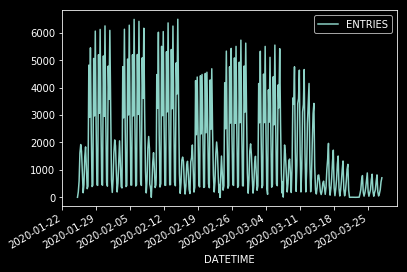

In [262]:
turnstyle_hourly[turnstyle_hourly["STATION"] == "1 AV"].plot('DATETIME', 'ENTRIES')
turnstyle_hourly.to_csv('turnstile_hourly.csv')

In [ ]:
listytwo = []

for scp, elem in tqdm_notebook(turnstile_copy.groupby(level = [0,1,2])):
    elem["EXIT DIFF"] = elem["EXITS                                                               "].diff()
    #turnstile_copy = pd.merge(turnstile_copy, elem, how='right', on = ['STATION', 'UNIT', 'SCP', 'DATE', 'TIME'])
    listytwo.append(elem)
"""
listy = []
turnstile_copy = turnstile_total
for scp, elem in tqdm_notebook(turnstile_total.groupby(level = [0,1,2])):
    elem["ENTR DIFF"] = elem["ENTRIES"].diff()
    #turnstile_copy = pd.merge(turnstile_copy, elem, how='right', on = ['STATION', 'UNIT', 'SCP', 'DATE', 'TIME'])
    listy.append(elem)
"""

/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
turnstile_concat_two = pd.concat(listytwo)

turnstile_conctat_two = turnstile_concat_two.reset_index(level = ["STATION","SCP", "UNIT", "C/A"], inplace = True)
turnstile_concat_two = turnstile_concat_two.sort_values(by = ["STATION", "DATE", "TIME"])
turnstile_concat_two = turnstile_concat_two.set_index(["STATION","DATE", "TIME"])
turnstile_concat_two

In [ ]:
rows = []
for scp, elem in tqdm_notebook(turnstile_concat_two.groupby(level = [0,1,2])):
    x = elem["ENTR DIFF"].sum()
    row = list(scp)
    datetime = parse(row[1] + " " + row[2])
    row.append(datetime)
    row.append(x)
    rows.append(row)

turnstyle_hourly_two = pd.DataFrame(rows, columns = ["STATION", "DATE", "TIME", "DATETIME", "ENTRIES"])
turnstyle_hourly_two

In [137]:
stations = list(turnstile_total["STATION"].unique())
t_units = list(turnstile_total[turnstile_total["STATION"] == '103 ST']["UNIT"].unique())
station_index = turnstile_total["STATION"] == "103 ST"
tunit_index = turnstile_total["UNIT"] == 'R314'

go = True;

for station in tqdm_notebook(stations):
    t_units = list(turnstile_total[turnstile_total["STATION"] == station]["UNIT"].unique())
    turnstile_station = turnstile_total[turnstile_total["STATION"] == station]
    for t_unit in t_units:
        turnstile_unit = turnstile_station[turnstile_station["UNIT"] == t_unit]
        t_scps = list(turnstile_unit["SCP"].unique())
        for t_scp in t_scps:
            station_index = turnstile_total["STATION"] == station
            tunit_index = turnstile_total["UNIT"] == t_unit
            tscp_index = turnstile_total["SCP"] == t_scp
            stationunitscp_index = station_index * tunit_index * tscp_index
            turnstile_total['ENTRY DIFF'] = turnstile_total[stationunitscp_index]["ENTRIES"].diff())
#stationunit_index = station_index * tunit_index
#turnstile_total[stationunit_index]
turnstile_total

KeyError: 'STATION'

In [19]:
turnstile_use['date'] = pd.to_datetime(turnstile_use['date'])
type(turnstile_use['date'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
turnstile_use_daily[turnstile_use_daily["stop_name"] == "Astoria - Ditmars Blvd"]

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,7024,7060
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15234,12171
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15687,14586
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9324,10309
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7659,8371
5,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-06,16658,12689
6,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-07,17308,13896
7,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-08,17592,15980
8,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-09,17510,14937
9,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-10,17208,15684


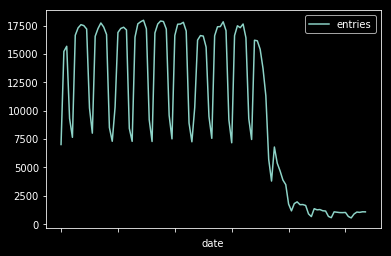

In [20]:
turnstile_use_daily[turnstile_use_daily["stop_name"] == "Astoria - Ditmars Blvd"].plot('date', 'entries')


In [21]:
type(turnstile_use_daily['date'][2])

str